In [26]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import matplotlib.font_manager as font_manager
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
font_prop = font_manager.FontProperties(size=18)
plt.rcParams["font.family"] = "Times"
%matplotlib inline

files = glob.glob("test_*.fits")

In [27]:
len(files)

26

In [28]:
files[0].split("_")[1].split(".fits")[0]

'60'

In [29]:
science = []
calib = []
known_spec = []
skies = []
standards = []
for i in files:
    data2 = Table.read(i, hdu = 2, format='fits')
    data1 = Table.read(i, hdu = 1, format='fits')
    skies.append(float(i.split("_")[1].split(".fits")[0]))
    standards.append(float(i.split("_")[2].split(".fits")[0]))
    #masking for assignment allocation
    assigned_SCIENCEfibers = ((data2['assigned'] == 1) & (data1['category'] == 'science'))
    assigned_CALIBfibers = ((data2['assigned'] == 1) & ((data1['category'] == 'sky_boss') | (data1['category'] == 'standard_boss')))


    #Carton breakdown
    assigned_known = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_known_spec'))
    #assigned_core = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_core'))
    #assigned_var = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_var'))
    #assigned_ancil = ((data2['assigned'] == 1) & (data1['carton'] == 'bhm_rm_ancillary'))
    
    science.append(len(data1[assigned_SCIENCEfibers]))
    calib.append(len(data1[assigned_CALIBfibers]))
    known_spec.append(len(data1[assigned_known]))

science = np.array(science)
calib = np.array(calib)
known_spec = np.array(known_spec)
skies = np.array(skies)
standards = np.array(standards)

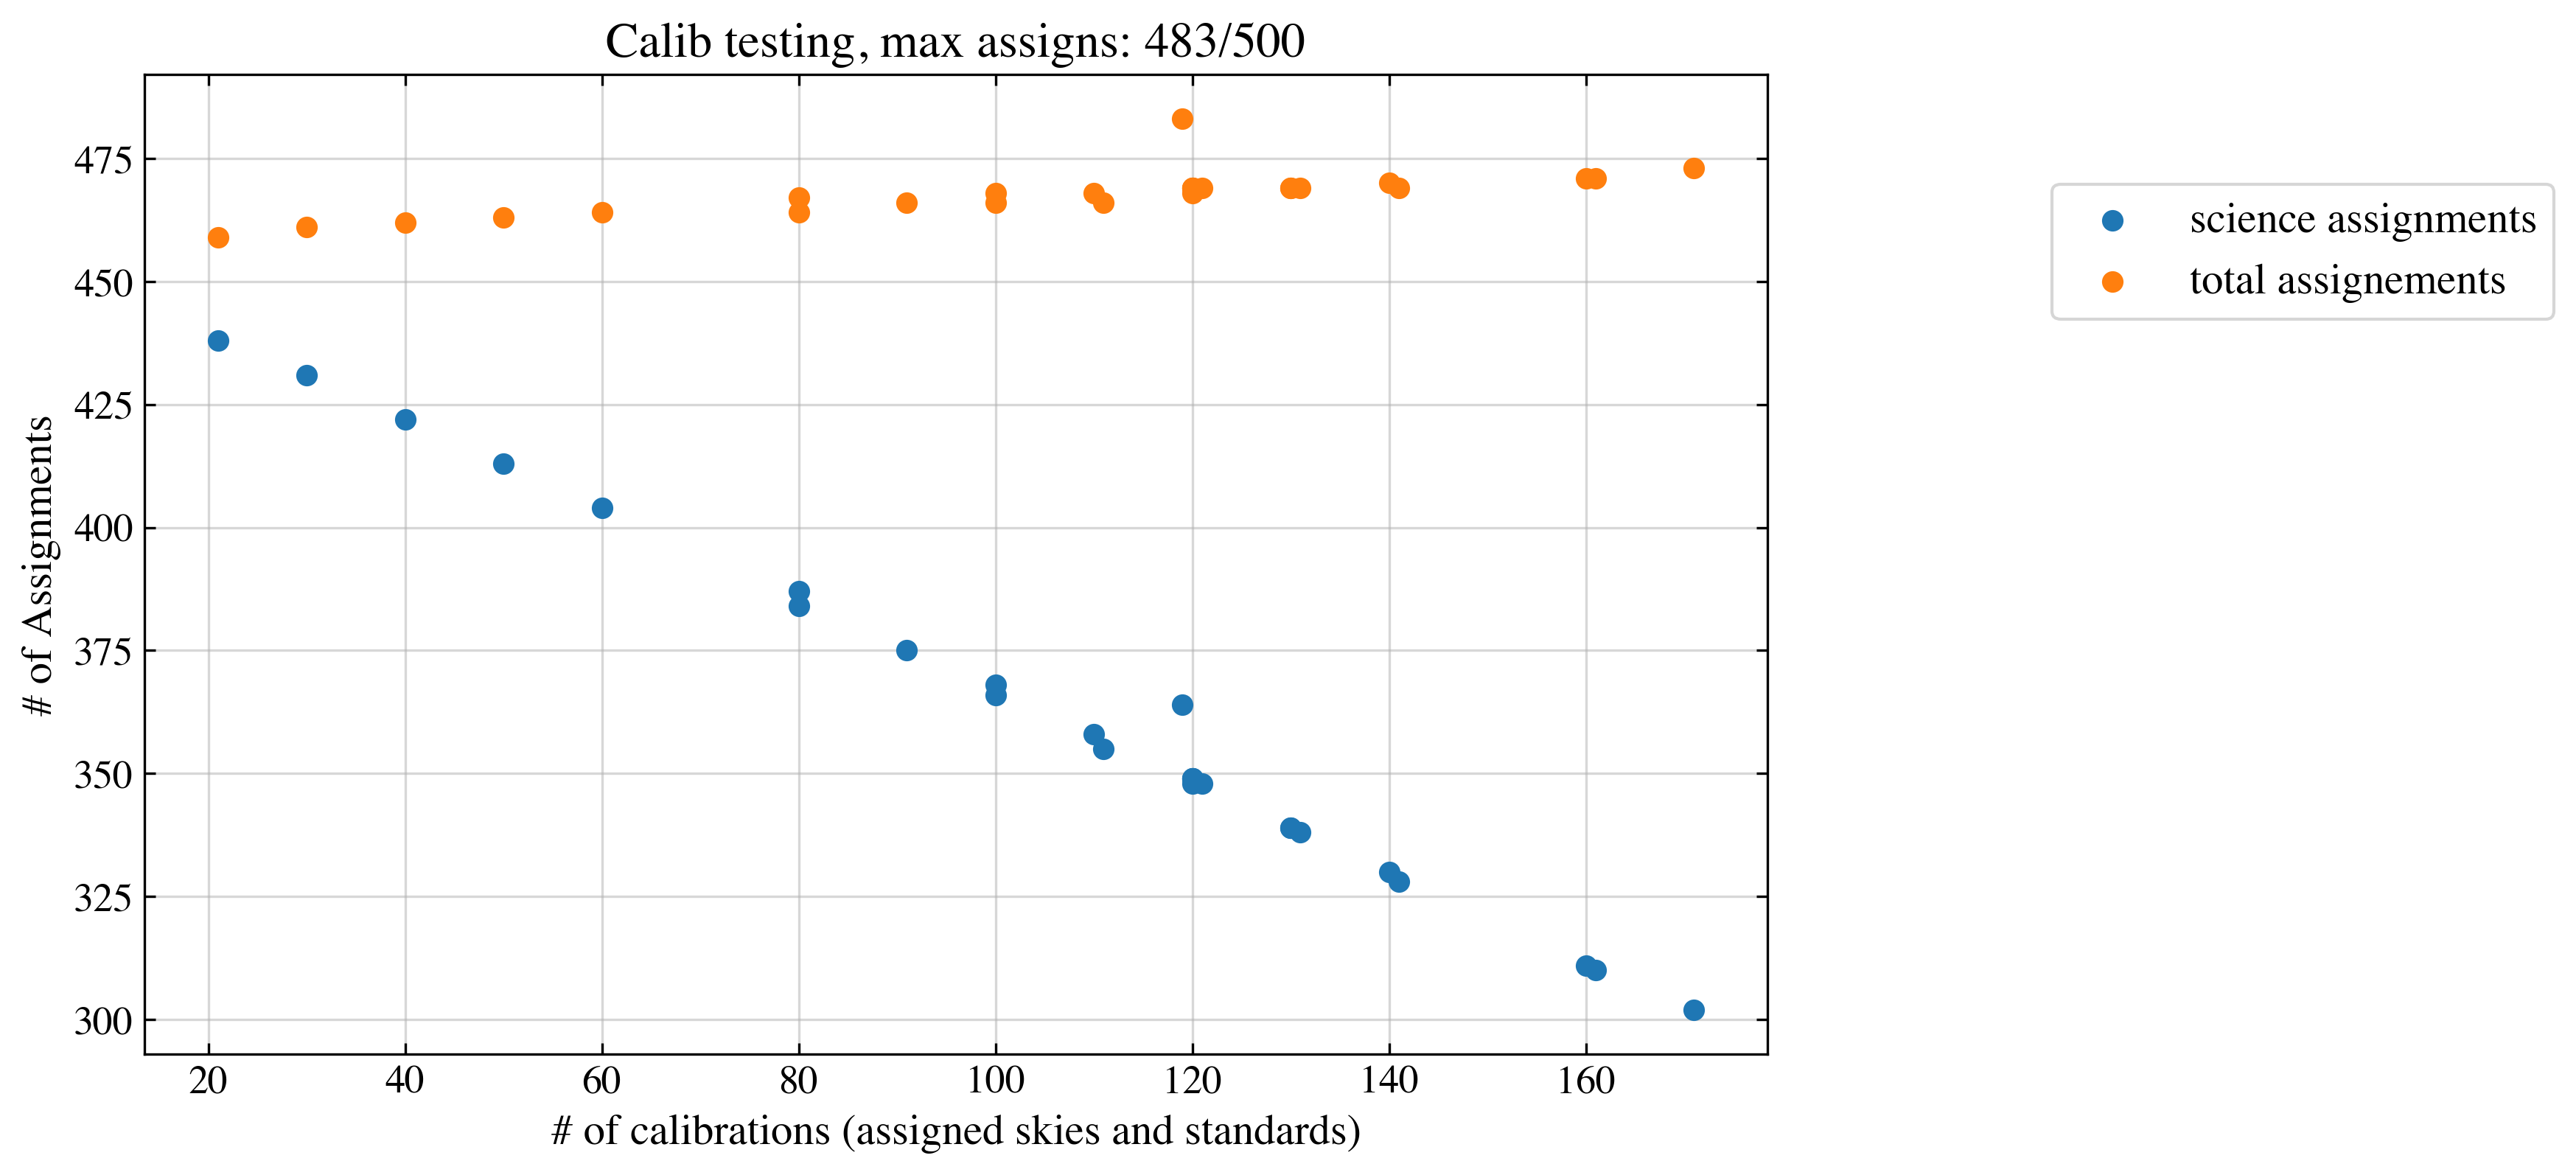

In [52]:
size = 14

#fig
fig, ax = plt.subplots(figsize=(8, 5), dpi=300, facecolor='white')
fig.tight_layout()
#field center lines
#plot
ax.scatter(calib, science, label="science assignments")
ax.scatter(calib, calib+science, label="total assignements")

#labels, etc
ax.set_xlabel("# of calibrations (assigned skies and standards)", fontsize=size)
ax.set_ylabel("# of Assignments", fontsize=size)
ax.set_title("Calib testing, max assigns: {}/500".format(np.max(calib+science)), fontsize=size+2)
ax.tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
plt.grid(alpha=0.5)
ax.set_axisbelow(True) 
plt.legend(loc=(1.175, 0.75), prop={"size":size})

#plt.savefig("calib_testing1.png", facecolor=fig.get_facecolor(), bbox_inches='tight',dpi=300)

In [31]:
asked = skies+standards
equal = (skies == standards)
more_skies = (skies > standards)
more_standards = (standards > skies)

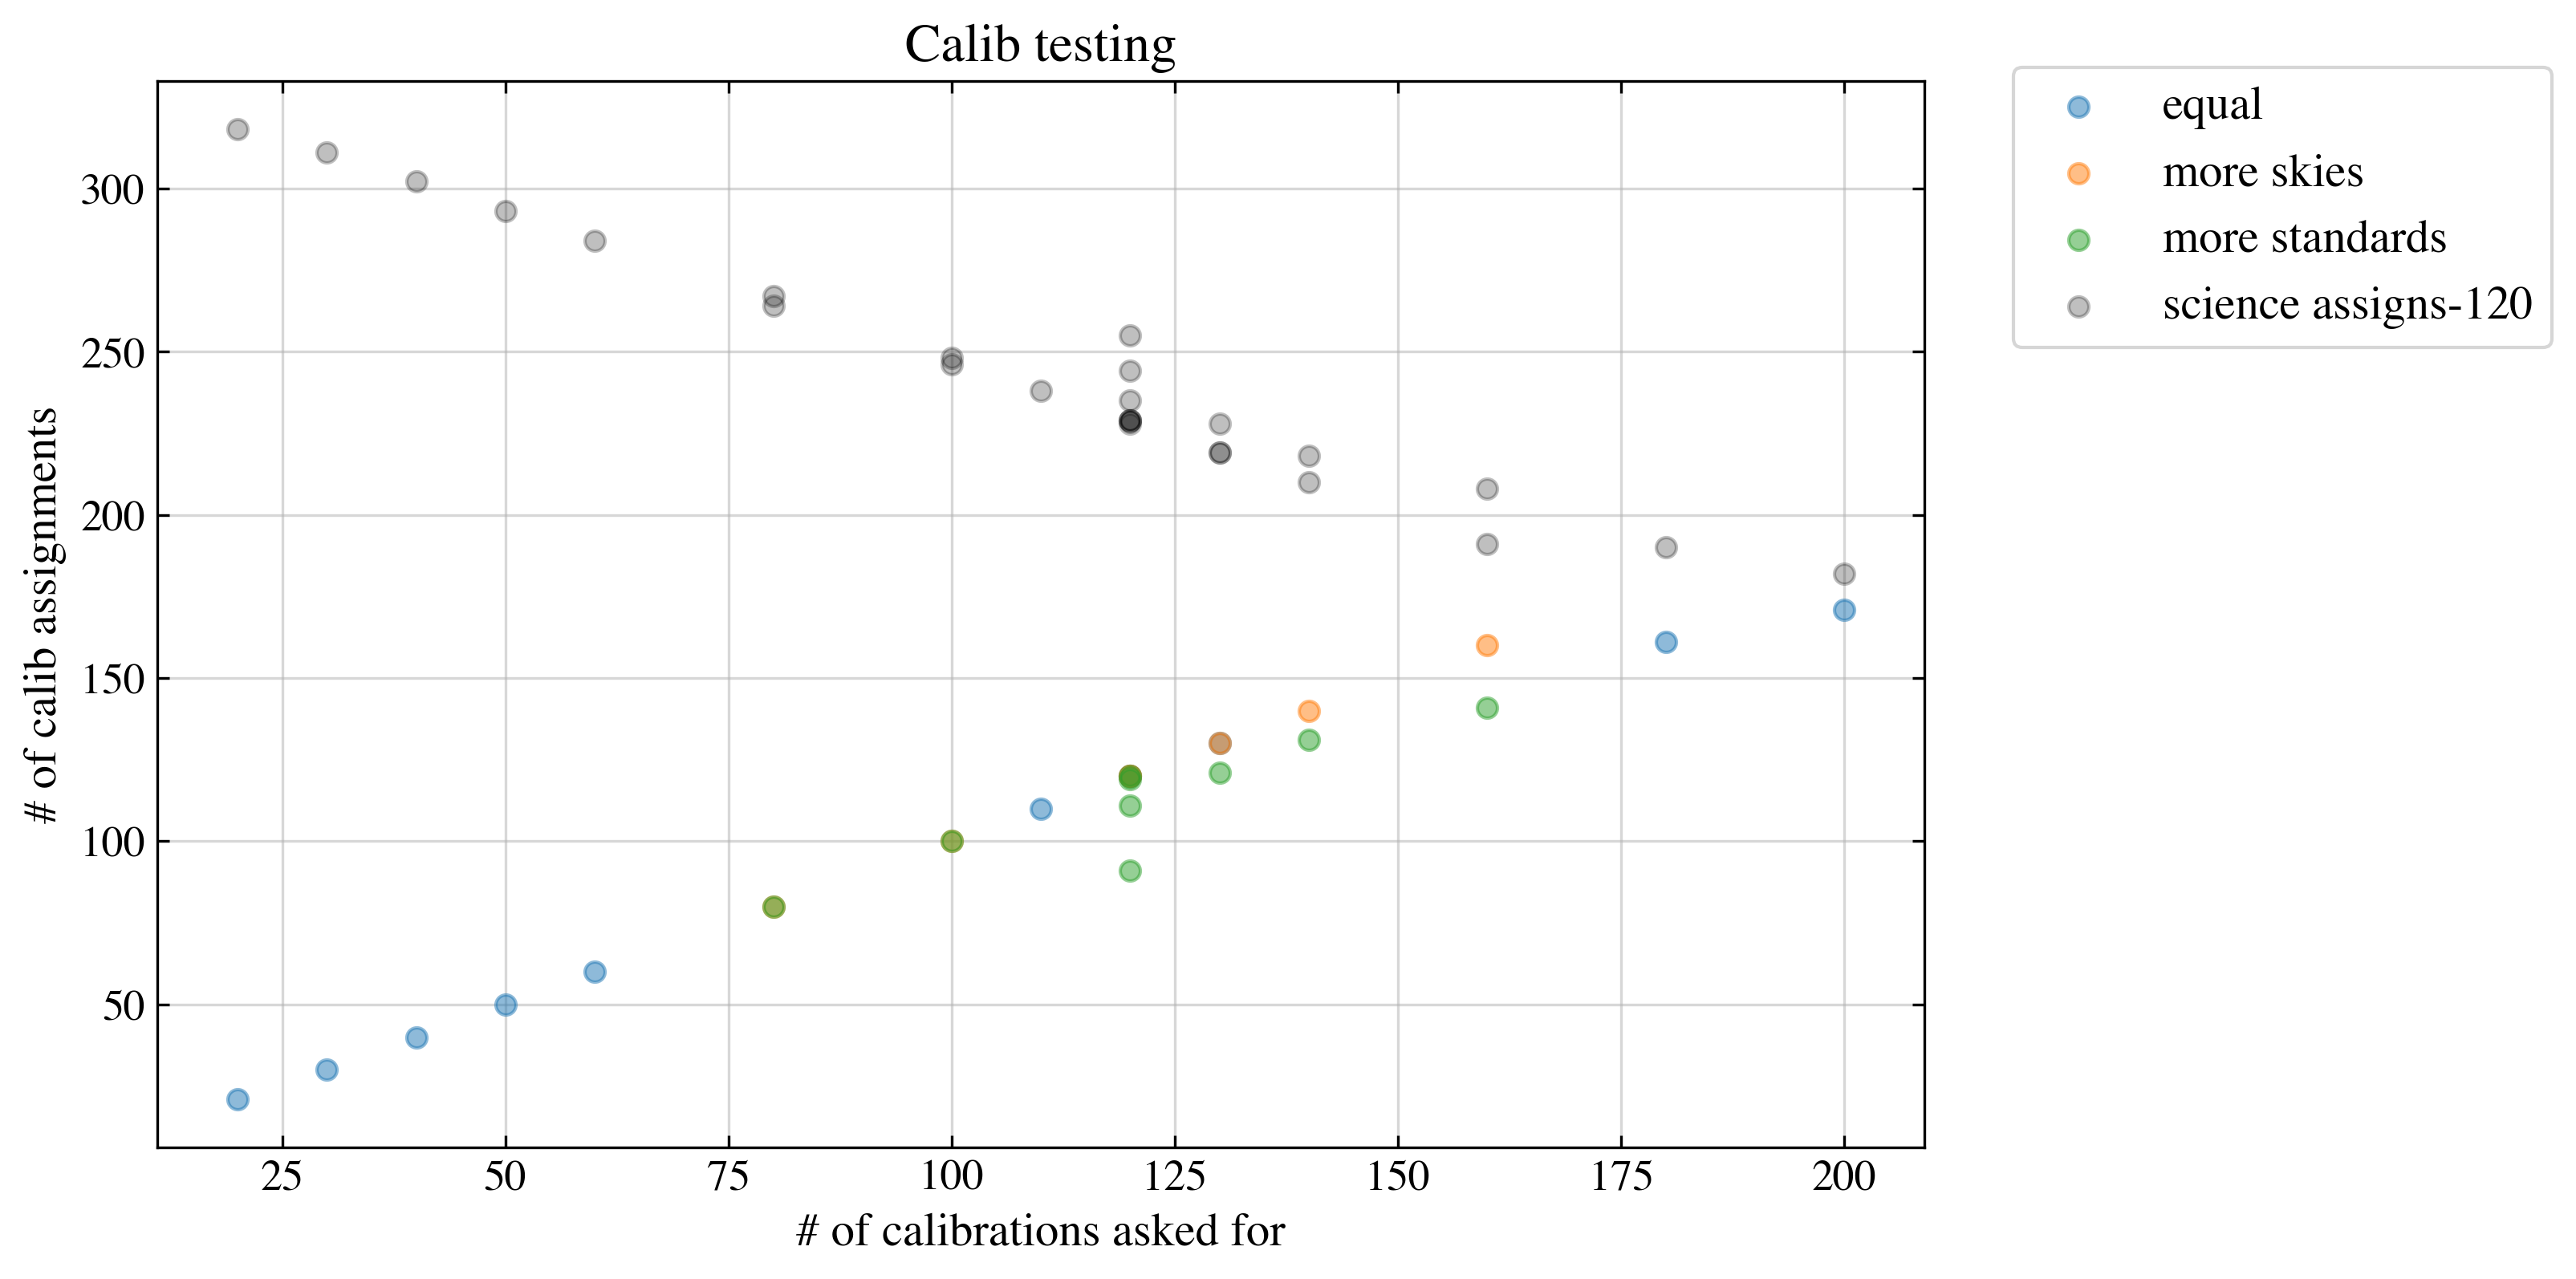

In [50]:
size = 14

#fig
fig, ax = plt.subplots(figsize=(8, 5), dpi=300, facecolor='white')
fig.tight_layout()
#field center lines
#plot
#ax.scatter(calib, science, label="science assignments")
ax.scatter(asked[equal], calib[equal], alpha= 0.5, label="equal")
ax.scatter(asked[more_skies], calib[more_skies], alpha= 0.5, label="more skies")
ax.scatter(asked[more_standards], calib[more_standards], alpha= 0.5, label="more standards")
ax.scatter(asked, science-120., c='black', alpha = 0.25, label="science assigns-120")
#labels, etc
ax.set_xlabel("# of calibrations asked for", fontsize=size)
ax.set_ylabel("# of calib assignments", fontsize=size)
ax.set_title("Calib testing", fontsize=size+2)
ax.tick_params(axis='both', which='major', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
ax.tick_params(axis='both', which='minor', labelsize=size-1, 
               top=True, right=True, bottom=True, left=True, direction='in')
plt.grid(alpha=0.5)
ax.set_axisbelow(True) 
plt.legend(loc=(1.05, 0.75), prop={"size":size})
#plt.savefig("calib_testing2.png", facecolor=fig.get_facecolor(), bbox_inches='tight',dpi=300)

In [7]:
calib

array([ 21,  30, 130,  80, 110, 141, 100,  60, 119, 131,  40])

In [37]:
skies+standards

array([120., 200.,  20., 100., 120.,  30., 120., 130., 130., 180., 130.,
       160.,  80., 110., 160.,  50., 100.,  60., 140.,  80., 120., 120.,
       140., 120.,  40., 120.])

In [35]:
skies

array([ 60., 100.,  10.,  60.,  70.,  15.,  40.,  50.,  65.,  90.,  80.,
        90.,  30.,  55.,  70.,  25.,  40.,  30.,  80.,  50.,  80.,  50.,
        60.,  55.,  20.,  20.])

In [36]:
standards

array([ 60., 100.,  10.,  40.,  50.,  15.,  80.,  80.,  65.,  90.,  50.,
        70.,  50.,  55.,  90.,  25.,  60.,  30.,  60.,  30.,  40.,  70.,
        80.,  65.,  20., 100.])